### Яушева АР

## Интеллектуальные экспертные системы и принятие решений
# Практическая работа 2.1

## Задание 1
### Парсер резюме
Разработайте парсер резюме, который сможет извлекать ключевые данные: имя, контакты, навыки и опыт работы. \
Для этого используйте Named Entity Recognition (NER) из spaCy.

In [70]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")

resume_text = '''
Osama Elsharqawy;
Email: elsharqawy2@gmail.com
Phone: +201155205222
Skills: C++, OpenGL, Python
Experience: Software Engineer at ALX Africa (2023-2024); GameForde - Junior Game Developer (2024-Now)
'''

doc = nlp(resume_text)

name = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

companies = [ent.text for ent in doc.ents if ent.label_ == "ORG"]

dates = [ent.text for ent in doc.ents if ent.label_ == "DATE"]

skills = []
if "Skills:" in resume_text:
    skills_line = resume_text.split("Skills:")[1].split("\n")[0]
    skills = [skill.strip() for skill in skills_line.split(",")]

email = re.findall(r'\S+@\S+', resume_text)
phone = re.findall(r'\+?\d[\d\s-]{7,}\d', resume_text)

print("Name:", name)
print("Companies:", companies)
print("Experience dates:", dates)
print("Skills:", skills)
print("Email:", email)
print("Phone:", phone)

Name: ['Osama Elsharqawy']
Companies: ['ALX Africa', 'GameForde']
Experience dates: ['2023-2024', '2024-Now']
Skills: ['C++', 'OpenGL', 'Python']
Email: ['elsharqawy2@gmail.com']
Phone: ['+201155205222', '2023-2024']


## Задание 2
### Парсер резюме
Создайте систему для классификации эмоций в тексте (радость, грусть, гнев и др.). Для этого можно использовать векторные представления и обучить модель классификатора. \
Подсказка: Используйте doc.vector для получения векторного представления текста

In [73]:
from spacy.cli import download
download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [86]:
texts = [
    # happiness
    ("I am so happy today!", "happiness"),
    ("This is amazing!", "happiness"),
    ("What a wonderful day!", "happiness"),
    ("I feel fantastic!", "happiness"),
    ("I'm thrilled with the results!", "happiness"),
    ("This makes me so joyful!", "happiness"),
    ("I'm over the moon!", "happiness"),
    ("What great news!", "happiness"),
    ("I feel so blessed!", "happiness"),
    ("This is perfect!", "happiness"),
    ("I'm ecstatic right now!", "happiness"),
    ("Life is beautiful!", "happiness"),
    ("I couldn't be happier!", "happiness"),
    ("This is absolutely wonderful!", "happiness"),
    ("I'm feeling so content!", "happiness"),
    ("What a fantastic surprise!", "happiness"),
    ("I'm walking on air!", "happiness"),
    ("This brings me so much joy!", "happiness"),
    ("I'm so grateful for this!", "happiness"),
    ("Everything is going great!", "happiness"),
    ("You make me so happy!", "happiness"),
    ("This is the best day ever!", "happiness"),
    ("I'm smiling from ear to ear!", "happiness"),
    ("My heart is full of joy!", "happiness"),
    ("What a beautiful moment!", "happiness"),
    ("I feel so alive and happy!", "happiness"),
    ("This success makes me so happy!", "happiness"),
    ("I'm bursting with happiness!", "happiness"),
    ("Today is absolutely perfect!", "happiness"),
    ("I feel pure bliss!", "happiness"),
    
    # sadness
    ("I feel terrible and sad.", "sadness"),
    ("I feel lonely.", "sadness"),
    ("I'm so disappointed.", "sadness"),
    ("This is really depressing.", "sadness"),
    ("I feel empty inside.", "sadness"),
    ("Nothing seems to work out.", "sadness"),
    ("I'm heartbroken.", "sadness"),
    ("This is so sad.", "sadness"),
    ("I feel miserable.", "sadness"),
    ("I can't stop crying.", "sadness"),
    ("Everything feels hopeless.", "sadness"),
    ("I'm feeling really down.", "sadness"),
    ("This is such a loss.", "sadness"),
    ("I feel so blue today.", "sadness"),
    ("The world seems gray.", "sadness"),
    ("I'm overwhelmed with sadness.", "sadness"),
    ("This hurts so much.", "sadness"),
    ("I feel so alone.", "sadness"),
    ("I miss you terribly.", "sadness"),
    ("I'm in a dark place.", "sadness"),
    ("Tears won't stop flowing.", "sadness"),
    ("I feel completely defeated.", "sadness"),
    ("This sadness is overwhelming.", "sadness"),
    ("I've never felt so low.", "sadness"),
    ("My heart is heavy with sorrow.", "sadness"),
    ("I feel utterly devastated.", "sadness"),
    ("The pain is unbearable.", "sadness"),
    ("I'm drowning in sadness.", "sadness"),
    ("This grief is too much to bear.", "sadness"),
    ("I feel broken inside.", "sadness"),
    
    # anger
    ("I am furious about this!", "anger"),
    ("He makes me so angry.", "anger"),
    ("This is infuriating!", "anger"),
    ("I'm boiling with rage!", "anger"),
    ("How dare you do that!", "anger"),
    ("This makes my blood boil!", "anger"),
    ("I'm so pissed off!", "anger"),
    ("I can't believe this nonsense!", "anger"),
    ("This is unacceptable!", "anger"),
    ("I'm seeing red right now!", "anger"),
    ("You've gone too far!", "anger"),
    ("I'm about to explode!", "anger"),
    ("This is outrageous!", "anger"),
    ("I'm livid!", "anger"),
    ("How could you be so stupid!", "anger"),
    ("I've had enough of this!", "anger"),
    ("This is driving me crazy!", "anger"),
    ("I'm so fed up with this!", "anger"),
    ("You make me so angry!", "anger"),
    ("I can't tolerate this anymore!", "anger"),
    ("I'm seething with anger!", "anger"),
    ("This injustice makes me furious!", "anger"),
    ("I want to scream in frustration!", "anger"),
    ("You have no right to do this!", "anger"),
    ("I'm absolutely enraged!", "anger"),
    ("This disrespect is unacceptable!", "anger"),
    ("I'm filled with wrath!", "anger"),
    ("How could you betray me like this!", "anger"),
    ("I'm boiling mad!", "anger"),
    ("This provokes my anger!", "anger"),
    ("I'm ready to punch something!", "anger"),
    ("You're pushing me to my limit!", "anger"),
    ("This makes me want to break things!", "anger"),
    ("I'm fuming with anger!", "anger"),
    ("You've crossed the line!", "anger"),
    ("I'm in a blind rage!", "anger"),
    ("This is making me violent!", "anger"),
    ("I hate you so much right now!", "anger"),
    ("You're making me lose my mind!", "anger"),
    ("I can't control my anger anymore!", "anger"),
    ("This is the last straw!", "anger"),
    ("I'm trembling with rage!", "anger"),
    ("You'll regret doing this to me!", "anger"),
    ("I'm so angry I can't think straight!", "anger"),
    ("This is absolutely maddening!", "anger"),
    ("I'm about to lose my temper completely!", "anger"),
    ("You've awakened a fury in me!", "anger"),
    ("I'm consumed by rage!", "anger"),
    ("This deserves a severe response!", "anger"),
    ("I'm not going to take this lying down!", "anger"),
    ("You've ignited my wrath!", "anger"),
    ("I'm filled with burning anger!", "anger"),
    ("This is completely unacceptable behavior!", "anger"),
    ("I'm on the verge of exploding!", "anger"),
    ("You've made me absolutely furious!", "anger"),
    ("I can feel the rage building inside me!", "anger"),
    ("This injustice fuels my anger!", "anger"),
    ("I'm so angry I could scream!", "anger"),
    ("You've provoked me beyond limits!", "anger"),
    ("I'm in a state of pure rage!", "anger"),
    ("This makes me want to retaliate!", "anger"),
    ("I'm overflowing with anger!", "anger"),
    ("You'll pay for what you've done!", "anger"),
    ("I'm burning with fury!", "anger"),
    ("This is utterly infuriating!", "anger"),
    ("I'm losing control of my anger!", "anger"),
    ("You've triggered my deepest rage!", "anger"),
    ("I'm consumed by violent thoughts!", "anger"),
    ("This deserves immediate action!", "anger"),
    ("I'm so angry I can't see straight!", "anger"),
    ("You've awakened the beast in me!", "anger"),
    ("I'm filled with destructive anger!", "anger"),
    ("This is absolutely intolerable!", "anger"),
    ("I'm on the brink of violence!", "anger"),
    ("You've made me see red!", "anger"),
    ("I'm shaking with uncontrollable rage!", "anger"),
    ("This injustice cannot stand!", "anger"),
    ("I'm boiling over with anger!", "anger"),
    ("I hate my life!", "anger")
]

In [88]:
import spacy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

nlp = spacy.load("en_core_web_md")

X = [text for text, label in texts]
y = [label for text, label in texts]

X = [nlp(text).vector for text in X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.81      1.00      0.89        17
   happiness       1.00      0.50      0.67         6
     sadness       1.00      0.80      0.89         5

    accuracy                           0.86        28
   macro avg       0.94      0.77      0.82        28
weighted avg       0.88      0.86      0.84        28



In [92]:
new_text = "I hate you."
new_vector = nlp(new_text).vector.reshape(1, -1)
predicted_emotion = clf.predict(new_vector)[0]
print("Predicted emotion:", predicted_emotion)

Predicted emotion: anger


## Задание 3
### Классификация текста
Реализуйте классификацию текстов по категориям (например, новости: спорт, политика, технологии). \
В качестве инструмента используйте text categorizer из spaCy.

In [1]:
data = [
    # СПОРТ 25 
    ("The team won the championship.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The football match ended with a 3-2 victory.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The athlete broke the world record in swimming.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The basketball game was incredibly intense.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("Our national team qualified for the Olympics.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The tennis player served an ace to win the set.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The marathon runners completed 42 kilometers.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The hockey team needs better defense strategies.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The boxing match ended with a knockout in round 5.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The gymnast performed a perfect routine on the beam.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The soccer league starts next weekend.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The baseball pitcher threw a no-hitter game.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The volleyball team needs more practice.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The athlete suffered a serious injury during training.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The championship finals will be broadcast live.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The rugby team displayed excellent teamwork.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The skier won gold in the downhill competition.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The cycling race covered 200 kilometers.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The golf tournament was postponed due to rain.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The athlete signed a multi-million dollar contract.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The winter Olympics feature ice hockey and skiing.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The coach implemented new training methods.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The stadium was filled with cheering fans.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The team needs to improve their offensive plays.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),
    ("The athlete set a new personal best record.", {"cats": {"SPORT": 1, "POLITICS": 0, "TECHNOLOGY": 0}}),

    # ПОЛИТИКА
    ("The government passed a new law.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The president gave a speech about economic reforms.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The parliament approved the budget for next year.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The election results were announced yesterday.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The minister resigned amid corruption allegations.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The new policy aims to reduce unemployment.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The diplomatic meeting addressed border issues.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The political party announced its manifesto.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The senate is debating the healthcare bill.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The prime minister visited the flood-affected areas.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The international summit focused on climate change.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The opposition criticized the government's approach.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The new legislation protects workers' rights.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The ambassador presented credentials to the host country.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The political crisis deepened as negotiations failed.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The tax reform bill passed with majority support.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The foreign minister discussed trade agreements.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The presidential candidate outlined their vision.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The government announced stimulus measures for economy.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The parliamentary session was adjourned until Monday.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The diplomatic relations between countries improved.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The new administration faces economic challenges.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The political alliance was formed before elections.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The government agency published its annual report.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),
    ("The minister answered questions in parliament.", {"cats": {"SPORT": 0, "POLITICS": 1, "TECHNOLOGY": 0}}),

    # ТЕХНОЛОГИИ
    ("AI is transforming industries.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("The new smartphone features advanced camera technology.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Researchers developed a breakthrough in quantum computing.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("The software update includes security enhancements.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("5G networks will revolutionize mobile connectivity.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("The tech company announced its latest product lineup.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Machine learning algorithms improve data analysis.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("The new laptop has impressive processing power.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Blockchain technology ensures secure transactions.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Virtual reality headsets provide immersive experiences.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("The internet of things connects everyday devices.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Cybersecurity measures protect against online threats.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("The robotics industry is experiencing rapid growth.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Cloud computing services offer scalable solutions.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("The new processor delivers exceptional performance.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Augmented reality apps enhance user experiences.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Data science techniques uncover valuable insights.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("The tech startup secured funding for expansion.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Wireless charging technology is becoming standard.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("The operating system received major updates.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Artificial intelligence assists in medical diagnosis.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("The drone technology has various applications.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Programming languages evolve with new features.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("The semiconductor industry faces supply challenges.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
    ("Biometric authentication enhances security systems.", {"cats": {"SPORT": 0, "POLITICS": 0, "TECHNOLOGY": 1}}),
]

test_texts = [
    "The football team trained hard for the finals",
    "The president will address the nation tonight",
    "New AI chip promises faster processing speeds",
    "The basketball tournament starts next month",
    "Parliament debates new environmental legislation",
    "Quantum computer solves complex problem in seconds",
    "The athlete won three gold medals",
    "Government announces new education policy",
    "Smart home devices learn user preferences",
    "The election campaign enters final phase"
]

In [2]:
import spacy
from spacy.training.example import Example

nlp = spacy.blank("en")

textcat = nlp.add_pipe("textcat", last=True)
textcat.add_label("SPORT")
textcat.add_label("POLITICS")
textcat.add_label("TECHNOLOGY")

#data

optimizer = nlp.begin_training()
for i in range(10):
    for text, annotations in data:
        doc = nlp.make_doc(text)
        train_data = Example.from_dict(doc, annotations)
        nlp.update([train_data], sgd=optimizer)

tests = [
    "The football team trained hard for the finals",
    "The president will address the nation tonight",
    "New AI chip promises faster processing speeds",
    "The basketball tournament starts next month",
    "Parliament debates new environmental legislation",
    "Quantum computer solves complex problem in seconds",
    "The athlete won three gold medals",
    "Government announces new education policy",
    "Smart home devices learn user preferences",
    "The election campaign enters final phase"
]

for t in tests:
    doc = nlp(t)
    print(t)
    print(doc.cats,'\n')

The football team trained hard for the finals
{'SPORT': 0.9998459815979004, 'POLITICS': 5.401465023169294e-05, 'TECHNOLOGY': 0.00010002664203057066} 

The president will address the nation tonight
{'SPORT': 0.7206292748451233, 'POLITICS': 0.2775079607963562, 'TECHNOLOGY': 0.00186279381159693} 

New AI chip promises faster processing speeds
{'SPORT': 0.0017604617169126868, 'POLITICS': 0.009969852864742279, 'TECHNOLOGY': 0.9882696866989136} 

The basketball tournament starts next month
{'SPORT': 0.9996484518051147, 'POLITICS': 0.0003226233529858291, 'TECHNOLOGY': 2.8970323910471052e-05} 

Parliament debates new environmental legislation
{'SPORT': 0.00897030346095562, 'POLITICS': 0.7831847667694092, 'TECHNOLOGY': 0.20784494280815125} 

Quantum computer solves complex problem in seconds
{'SPORT': 0.9046077728271484, 'POLITICS': 0.07857561856508255, 'TECHNOLOGY': 0.01681659370660782} 

The athlete won three gold medals
{'SPORT': 0.999434769153595, 'POLITICS': 0.0004888050607405603, 'TECHNOL

## Задание 4
### Извлечение ключевых слов
Напишите программу для извлечения ключевых слов из текста. \
Для этого используйте частотный анализ и фильтрацию по частям речи (существительные, прилагательные)

In [106]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

text = """
'Cause it's too cold.
For you here.
And now, so let me hold.
Both your hands in my sweater.
And if I may just take your breath away.
I don't mind if there's not much to say.
Sometimes the silence guides a mind.
To move to a place so far away.
"""

doc = nlp(text)

keywords = [token.text.lower() for token in doc
            if token.pos_ in ["NOUN", "ADJ"]
            and not token.is_stop
            and token.is_alpha]

word_freq = Counter(keywords)

top_keywords = word_freq.most_common(10)

print("Keywords:")
for word, freq in top_keywords:
    print(f"{word}: {freq}")

Keywords:
cold: 1
hands: 1
sweater: 1
breath: 1
silence: 1
mind: 1
place: 1


## Контрольные вопросы
1. Какие преимущества использования spaCy для практических проектов NLP?
2. Чем Named Entity Recognition отличается от классификации текста?
3. Как можно применять извлечение ключевых слов в SEO-задачах?
4. Какие сложности могут возникнуть при разработке чат-бота с использованием spaCy?

1. быстрый, предобученные модели, удобный пайплайн, векторы, совместимость с ML.
2. NER → сущности на уровне слов, классификация → категория для всего текста.
3. темы страницы, оптимизация контента, анализ отзывов.
4. ограниченные модели, синонимы, обучение кастомных моделей, диалоговая логика, память для больших данных.

# Практическая работа 2

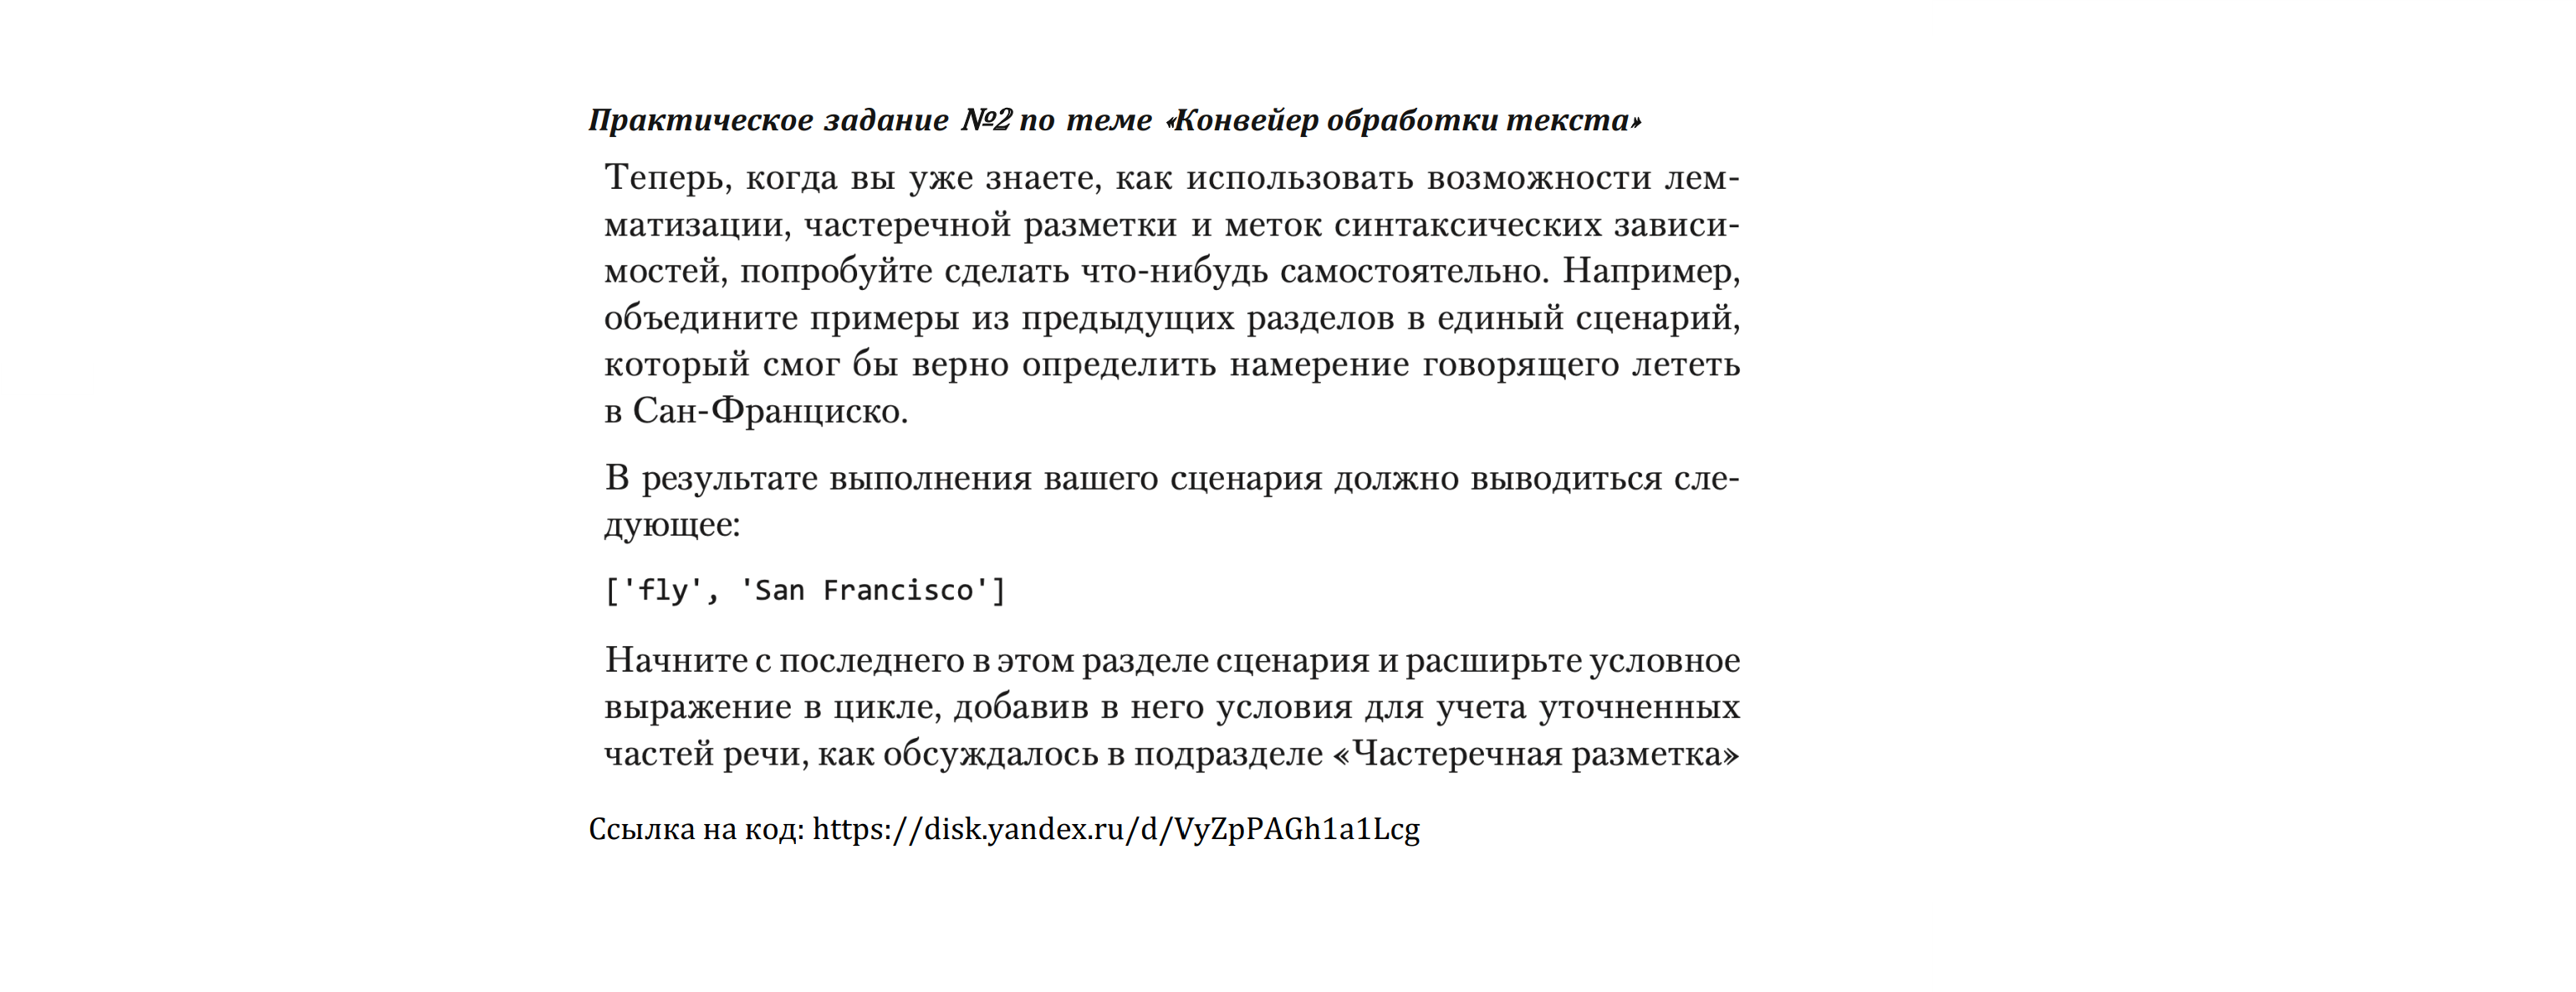

In [39]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "I have flown to LA. Now I am flying to Frisco."
doc = nlp(text)

result = []

for sent in doc.sents:

    for w in sent:
        if w.dep_ == "ROOT" and w.tag_ in ("VB", "VBG"):
            result.append(w.lemma_)
            for child in w.children:
                if child.dep_ == "prep" and child.text == "to":
                    for obj in child.children:
                        if obj.dep_ == "pobj" and obj.ent_type_ == "GPE":
                            city = "San Francisco" if obj.lemma_ == "Frisco" else obj.lemma_
                            result.append(city)

print(result)

['fly', 'San Francisco']


In [36]:
from spacy import displacy
displacy.render(doc, style="dep", jupyter=True)